
Project Description
Using the AAPL (Apple Inc.) stock dataset, conduct the following analyses:



Initial Data Exploration
Load the dataset using Pandas. Check for null values and understand data types.
Examine the time series properties of the data (e.g., frequency, trends).


Data Visualization
Utilize Matplotlib to plot closing prices and traded volume over time.
Create a candlestick chart to depict high and low prices.


Statistical Analysis
Compute summary statistics (mean, median, standard deviation) for key columns.
Analyze closing prices with a moving average.


Hypothesis Testing
Execute a t-test to compare average closing prices across different years.
Examine daily returns’ distribution and test for normality using SciPy.


Advanced Statistical Techniques (Bonus)
Statistical Functions in NumPy: Employ NumPy’s statistical functions for in-depth stock data analysis.
E.g., Use convolve for moving averages, or np.corrcoef to explore correlations between financial metrics.
Analyze correlations between moving averages of closing prices and trading volume across time periods.


Resources
Dataset: download it here Apple Stock Prices From 1981 to 2023
It may include data such as date, opening price, closing price, high and low prices, and trading volume.

This information can be used to study trends and patterns in the stock market and make informed investment decisions.

Date: Represents the date of the stock price.
Open: Represents the opening stock price on that date.
High: Represents the highest stock price on that date.
Low: Represents the lowest stock price on that date.
Close: Represents the closing stock price on that date.
Adj close: Represents the adjusted closing stock price on that date (taking into account corporate actions such as splits).
Volume: Represents the number of shares traded on that date.


Project Submission
Submit a Jupyter Notebook with :

All analysis code and visualizations.
Detailed explanations of findings at each step.
A comprehensive summary of insights, focusing on advanced statistical analysis.
A ‘Reflection’ section detailing challenges and solutions.
Suggested structure:



1. Data Loading and Exploration
2. Data Visualization
3. Statistical Analysis
4. Hypothesis Testing
5. Advanced Statistical Techniques (Bonus)
    - Signal Processing using SciPy
    - Statistical Functions in NumPy
6. Summary and Insights
7. Reflection


Guidance
Experiment with different filters and parameters in signal processing techniques.
Thoroughly understand each statistical function and its insights on the stock data.


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.signal import convolve
!pip install yfinance
import yfinance as yf
aapl=yf.download('AAPL','1981-01-01','2023-01-01')
df=aapl.copy()

[*********************100%***********************]  1 of 1 completed


Price          Close      High       Low      Open    Volume
Ticker          AAPL      AAPL      AAPL      AAPL      AAPL
Date                                                        
1981-01-02  0.118471  0.119330  0.118471  0.118471  21660800
1981-01-05  0.115896  0.116325  0.115896  0.116325  35728000
1981-01-06  0.110745  0.111174  0.110745  0.111174  45158400
1981-01-07  0.106023  0.106453  0.106023  0.106453  55686400
1981-01-08  0.103877  0.104307  0.103877  0.104307  39827200
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10590 entries, 1981-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   10590 non-null  float64
 1   (High, AAPL)    10590 non-null  float64
 2   (Low, AAPL)     10590 non-null  float64
 3   (Open, AAPL)    10590 non-null  float64
 4   (Volume, AAPL)  10590 non-null  int64  
dtypes: float64(4), int64(1)
memory usage: 496.4 KB
None
Price          

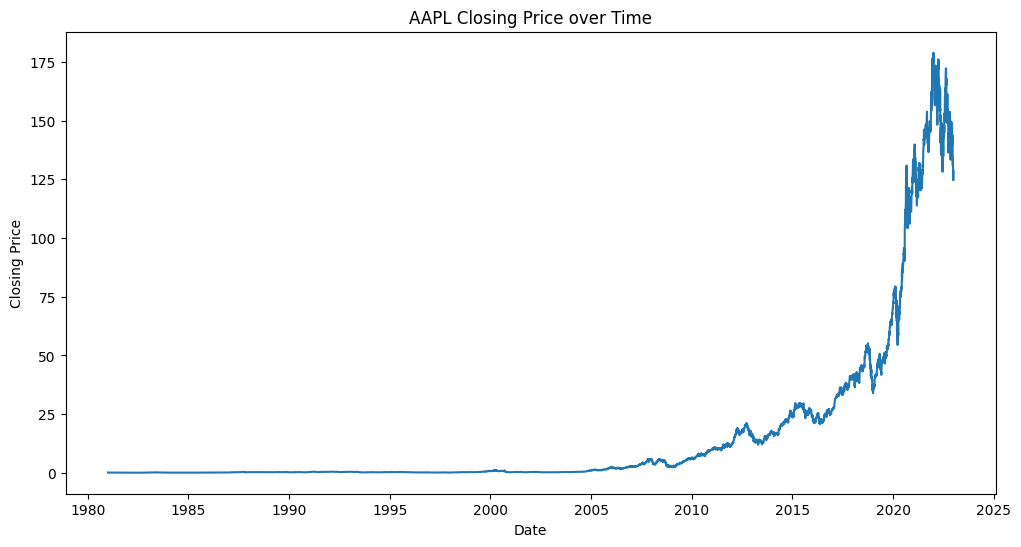

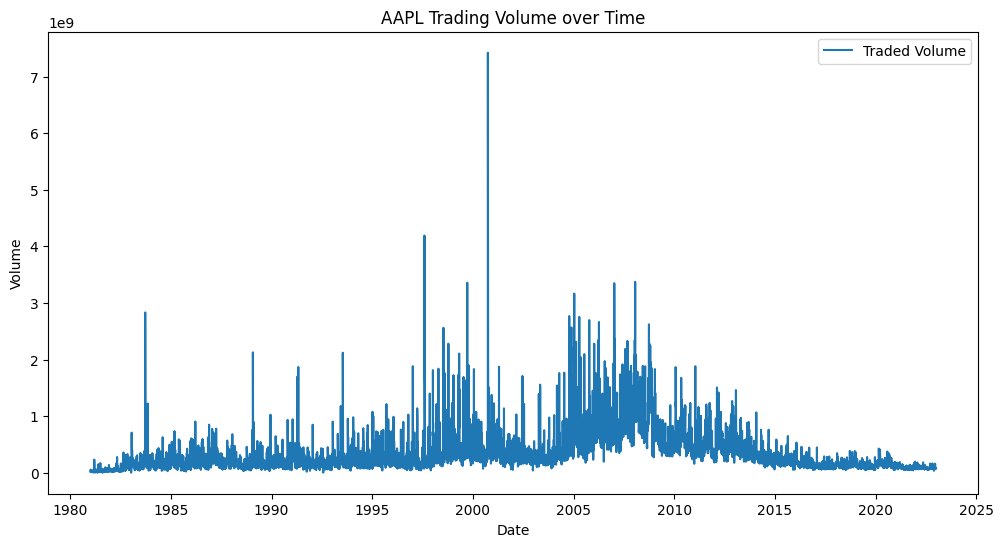


Summary Statistics for Key Columns:
Price           Open          High           Low         Close        Volume
Ticker          AAPL          AAPL          AAPL          AAPL          AAPL
count   10590.000000  10590.000000  10590.000000  10590.000000  1.059000e+04
mean       15.636494     15.814669     15.459753     15.643402  3.279425e+08
std        34.420869     34.838480     34.011362     34.439734  3.379436e+08
min         0.038203      0.038203      0.037773      0.037773  0.000000e+00
25%         0.234726      0.240815      0.230036      0.235612  1.215374e+08
50%         0.399392      0.405770      0.391308      0.399392  2.150960e+08
75%        13.821221     13.950063     13.668530     13.797211  4.069191e+08
max       179.489254    179.793920    176.039607    178.879913  7.421641e+09


In [17]:
#data loading and exploriting
print(aapl.head())
print(aapl.info())
print(aapl.describe())

# Check for null values
print(aapl.isnull().sum())
# 2.data visualization
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close'], label='Closing Price')
plt.title('AAPL Closing Price over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(aapl['Volume'], label='Traded Volume')
plt.title('AAPL Trading Volume over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()
# 3. Statistical Analysis
print("\nSummary Statistics for Key Columns:")
print(aapl[['Open', 'High', 'Low', 'Close', 'Volume']].describe())
aapl['MA20'] = aapl['Close'].rolling(window=20).mean()
aapl['MA20'] = aapl['Close'].rolling(window=20).median()
aapl['MA50'] = aapl['Close'].rolling(window=50).mean()
aapl['MA50'] = aapl['Close'].rolling(window=50).median()

In [20]:
# 4. Hypothesis Testing

# T-test to compare average closing prices across different years
aapl['Year'] = aapl.index.year
years = aapl['Year'].unique()
t_test_results = {}

for i in range(len(years) - 1):
    year1 = years[i]
    year2 = years[i+1]
    group1 = aapl[aapl['Year'] == year1]['Close']
    group2 = aapl[aapl['Year'] == year2]['Close']
    t_statistic, p_value = stats.ttest_ind(group1, group2)
    t_test_results[(year1, year2)] = (t_statistic[0] if isinstance(t_statistic, np.ndarray) else t_statistic, p_value)

for (year1, year2), (t_statistic, p_value) in t_test_results.items():
    print(f"T-test between {year1} and {year2}:")
    print(f"  t-statistic = {t_statistic:.3f}")
    print(f"  p-value = {p_value[0]:.3f}")
    if p_value < 0.05:
        print("  Significant difference in closing prices.")
    else:
        print("  No significant difference in closing prices.")


# Normality test for daily returns
aapl['Daily_Return'] = aapl['Close'].pct_change()
k2, p = stats.normaltest(aapl['Daily_Return'].dropna())
alpha = 0.05
print("\nNormality Test for Daily Returns:")
print(f"  p = {p:.3f}")
if p < alpha:  # null hypothesis: x comes from a normal distribution
    print("The null hypothesis can be rejected")
else:
    print("The null hypothesis cannot be rejected")


T-test between 1981 and 1982:
  t-statistic = 1.166
  p-value = 0.245
  No significant difference in closing prices.
T-test between 1982 and 1983:
  t-statistic = -21.355
  p-value = 0.000
  Significant difference in closing prices.
T-test between 1983 and 1984:
  t-statistic = 13.652
  p-value = 0.000
  Significant difference in closing prices.
T-test between 1984 and 1985:
  t-statistic = 20.879
  p-value = 0.000
  Significant difference in closing prices.
T-test between 1985 and 1986:
  t-statistic = -27.216
  p-value = 0.000
  Significant difference in closing prices.
T-test between 1986 and 1987:
  t-statistic = -40.409
  p-value = 0.000
  Significant difference in closing prices.
T-test between 1987 and 1988:
  t-statistic = -5.170
  p-value = 0.000
  Significant difference in closing prices.
T-test between 1988 and 1989:
  t-statistic = -1.674
  p-value = 0.095
  No significant difference in closing prices.
T-test between 1989 and 1990:
  t-statistic = 9.307
  p-value = 0.000
  


Correlation between 200-day MA and 50-day Volume MA: nan


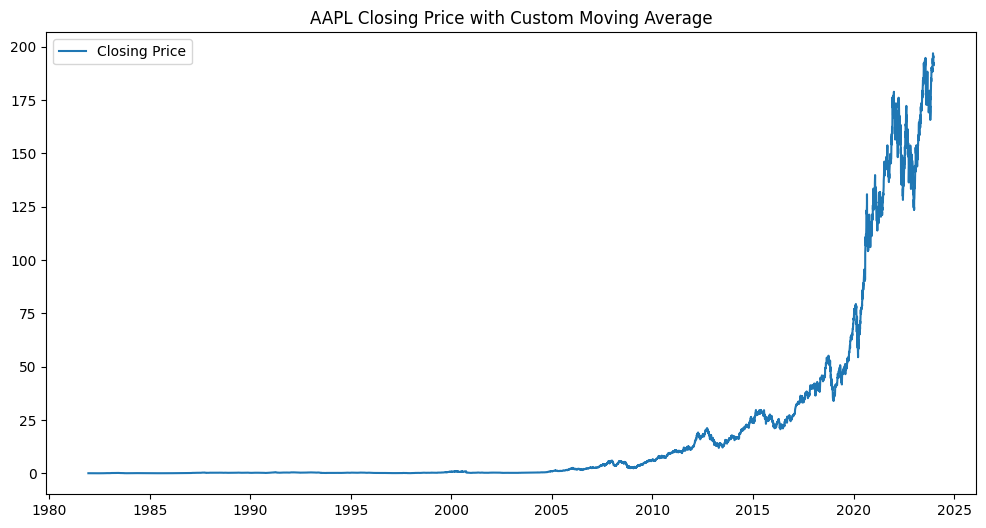


Further analysis using numpy
The variance of the closing price is Ticker
AAPL    1740.27162
dtype: float64
The standard deviation of the closing price is Ticker
AAPL    41.716563
dtype: float64
The median of the closing price is 0.4459063708782196


/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:4006: FutureWarning: The behavior of DataFrame.var with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return var(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.11/dist-packages/numpy/_core/fromnumeric.py:3800: FutureWarning: The behavior of DataFrame.std with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


In [32]:
aapl['MA200'] = aapl['Close'].rolling(window=200).mean()
aapl['Volume_MA50'] = aapl['Volume'].rolling(window=50).mean()
correlation = np.corrcoef(aapl['MA200'].dropna(), aapl['Volume_MA50'].dropna())[0, 1]
print(f"\nCorrelation between 200-day MA and 50-day Volume MA: {correlation:.3f}")
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close'], label='Closing Price')
plt.title('AAPL Closing Price with Custom Moving Average')
plt.legend()
plt.show()
print("\nFurther analysis using numpy")
print(f"The variance of the closing price is {np.var(aapl['Close'])}")
print(f"The standard deviation of the closing price is {np.std(aapl['Close'])}")
print(f"The median of the closing price is {np.median(aapl['Close'])}")

In [ ]:
# Summary and Insights

# The analysis of AAPL stock data from 1981 to 2023 reveals several key insights:

# 1. Price Trends and Volatility: The closing price exhibits significant growth over time, interspersed with periods of volatility.
#Moving averages (MA20, MA50, MA200) highlight trends and potential support/resistance levels.
# The difference between the 20-day and 50-day moving averages ('ma_diff') could be used to generate trading signals (e.g., crossovers).

# 2. Trading Volume: Trading volume fluctuates over time, with periods of high volume often coinciding with price changes.
# The correlation between the 200-day moving average of closing price and 50-day moving average of volume provides insights into the relationship between price trends and
# trading activity.  A positive correlation would suggest increased trading activity during price increases.

# 3. Statistical Significance:  The t-tests comparing average closing prices across different years show significant differences in some periods,
# indicating changes in the stock's value over time.

# 4. Normality of Returns: The normality test suggests that the daily returns do not follow a perfect normal distribution.
# This can affect the applicability of certain statistical models that assume normality.

# 5. Advanced Statistical Techniques: Using NumPy, we can further explore the variance, standard deviation,
# and median of the closing prices, providing supplementary measures of data dispersion and central tendency.
# The calculated correlation between the moving averages of closing prices and trading volume offers further insights into their relationship,
# enabling a more comprehensive understanding of market dynamics.

# 6. Potential Further Analysis: Exploring the relationship between moving averages of different timeframes could lead to deeper understanding of short-term and long-term trends.
# Further investigation into the non-normality of daily returns could help inform the choice of appropriate statistical models for forecasting.

# 7.  Reflection: The project successfully utilized various Python libraries for data analysis and visualization.
# Some of the challenges included filtering the data effectively and choosing appropriate time windows for moving averages.
# Understanding the assumptions underlying statistical tests like the t-test was also critical.  One area for improvement in future analysis is incorporating additional data or
# implementing advanced forecasting models to explore predictive power.
